# Principal Component Analysis

### PCA is a transformation of the data in an attempt to find out what features explain the most variance in the data. The goal is to get rid of the components that don't explain much of the variance in the data.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [19]:
df = pd.read_csv('../data/dengue_features_entire.csv')

In [23]:
sj = df[df['city'] == 'sj']

In [24]:
iq = df[df['city'] == 'iq']

In [25]:
sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [6]:
df = df.drop('city', 1).drop('week_start_date', 1)

In [7]:
df.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [8]:
y = df['total_cases']

In [9]:
df = df.drop('total_cases', 1)

In [10]:
from sklearn.preprocessing import StandardScaler

Scale the data so that each feature has a single-unit variance before we use PCA

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_data = scaler.transform(df)

1. Instantiate a PCA object
2. Find the principal components using the .fit() method
3. Apply the rotation and dimensionality reduction by calling transform

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Transform the data to its first principal components

In [17]:
x_pca = pca.transform(scaled_data)

In [18]:
scaled_data.shape

(1199, 22)

In [19]:
x_pca.shape

(1199, 2)

Reduced it to the first two principal components.
Now we can plot the dimensions using matplotlib.

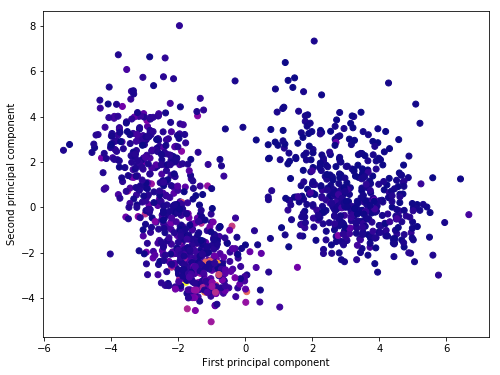

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

The components correspond to combinations of the original features.

In [21]:
pca.components_

array([[ 0.1775079 ,  0.05110209,  0.29120493,  0.28574438,  0.22149425,
         0.25383972,  0.17937551, -0.09231372,  0.054665  ,  0.12084984,
         0.32307535, -0.25214239,  0.14148443,  0.24905691,  0.17937551,
         0.13815401,  0.31438098,  0.14593688,  0.31030051,  0.27464633,
        -0.0988989 ,  0.15732443],
       [ 0.02699767, -0.19519308,  0.095008  ,  0.0881792 ,  0.08242215,
         0.09266157, -0.12166591, -0.3587715 , -0.34532941, -0.37206659,
        -0.03048502, -0.28063995, -0.08931129, -0.0370408 , -0.12166591,
        -0.36478271,  0.10274079, -0.33668455,  0.08171388, -0.16422121,
        -0.36455762, -0.020439  ]])

Each row represents a principal component; each column relates back to the original features

In [22]:
df_comp = pd.DataFrame(pca.components_, columns=df.columns)

In [23]:
df_comp

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.177508,0.051102,0.291205,0.285744,0.221494,0.253840,0.179376,-0.092314,0.054665,0.120850,...,0.141484,0.249057,0.179376,0.138154,0.314381,0.145937,0.310301,0.274646,-0.098899,0.157324
1,0.026998,-0.195193,0.095008,0.088179,0.082422,0.092662,-0.121666,-0.358771,-0.345329,-0.372067,...,-0.089311,-0.037041,-0.121666,-0.364783,0.102741,-0.336685,0.081714,-0.164221,-0.364558,-0.020439


### Below is a heatmap that shows the relationship between the coorelation of the various features and the principal components.
Each principal component is shown as a row. The hotter the colors (towards the yellow), the more correlated to a specific feature in the columns.

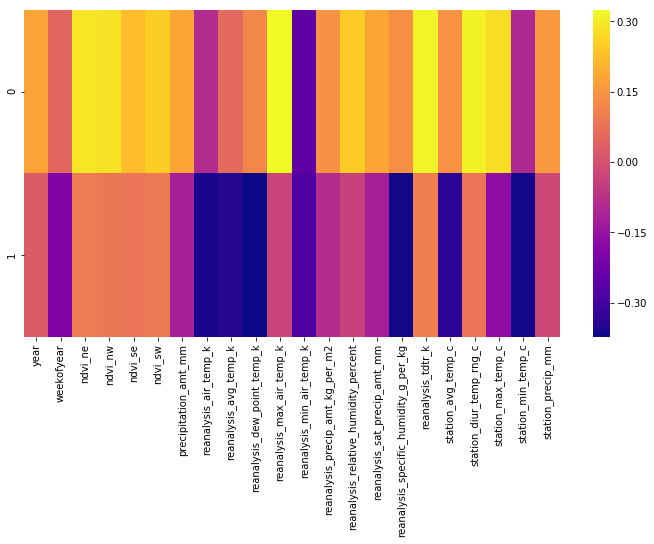

In [24]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_comp, cmap='plasma')

In [25]:
type(x_pca)

numpy.ndarray

In [26]:
x_pca.shape

(1199, 2)

In [27]:
len(x_pca)

1199

### Save the array to a textfile so that we can use it when creating our other models

In [28]:
np.savetxt('../data/x_pca_2.txt', x_pca)

### <font color="#2bbbad">Now that we have these principal components, we can feed x_pca into a regression model, instead of running a regression model on the entire dataframe of features.</font>